### Load the test and training set.



In [39]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer, Imputer
from sklearn.pipeline import Pipeline, FeatureUnion # These ones are new!

sns.set_style('darkgrid')

%matplotlib inline

In [40]:
#read in the data
test = pd.read_csv('/Users/ohoudaziz/desktop/project-2/test.csv')
train = pd.read_csv('/Users/ohoudaziz/desktop/project-2/train.csv')

In [41]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


## EDA

In [42]:
print(' train dataset has {} rows and {} columns.'.format(train.shape[0], train.shape[1]))
print(' test dataset has {} rows and {} columns.'.format(test.shape[0], test.shape[1]))

 train dataset has 2051 rows and 82 columns.
 test dataset has 879 rows and 80 columns.


In [43]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


The cheapest house sold for $12,789 and the most expensive for $611,657
The average sales price is $181,470, while median is $162,500


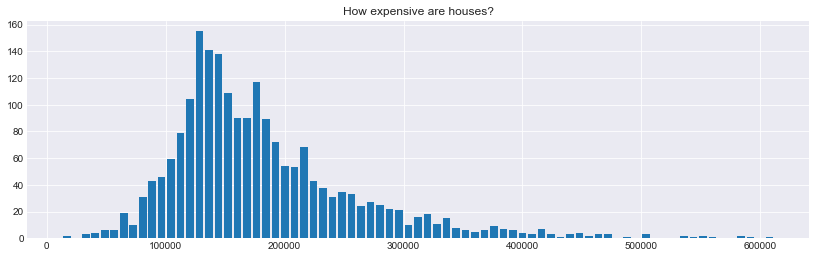

In [44]:
# How expensive are houses?
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    train.SalePrice.min(), train.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    train.SalePrice.mean(), train.SalePrice.median()))
train.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

In [45]:
def data_cleaning(df):
    for column in df.columns:
        df.rename(columns={column: column.replace(' ', '')}, inplace=True)
        
    df['BsmtQual'].loc[df['BsmtQual'].isnull()] = 'NA'
    df['BsmtCond'].loc[df['BsmtCond'].isnull()] = 'NA'
    df['BsmtFinType1'].loc[df['BsmtFinType1'].isnull()] = 'NA'
    df['BsmtFinType2'].loc[df['BsmtFinType2'].isnull()] = 'NA'
    df['MiscFeature'].loc[df['MiscFeature'].isnull()] = 'NA'
    df['GarageType'].loc[df['GarageArea']==0] = 0

    df['GarageQual'].loc[df['GarageArea']==0] = 0
    df['GarageCond'].loc[df['GarageArea']==0] = 0

    df['GarageQual'].loc[df['GarageArea']!=0] = df['GarageQual'].value_counts().sort_values().index[-1]
    df['GarageCond'].loc[df['GarageArea']!=0] = df['GarageQual'].value_counts().sort_values().index[-1]
        
data_cleaning(train)
data_cleaning(test)

/Users/ohoudaziz/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


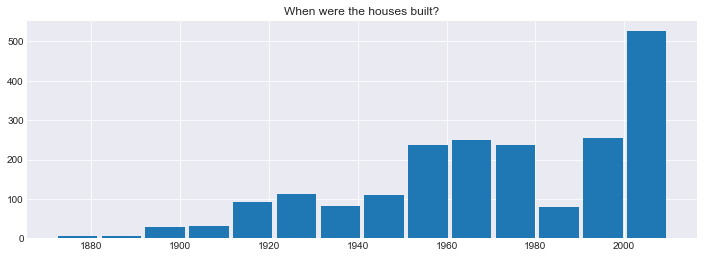

' Oldest house built in 1872. Newest house built in 2010. '

In [46]:
train.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

f" Oldest house built in {train.YearBuilt.min()}. Newest house built in {train.YearBuilt.max()}. "

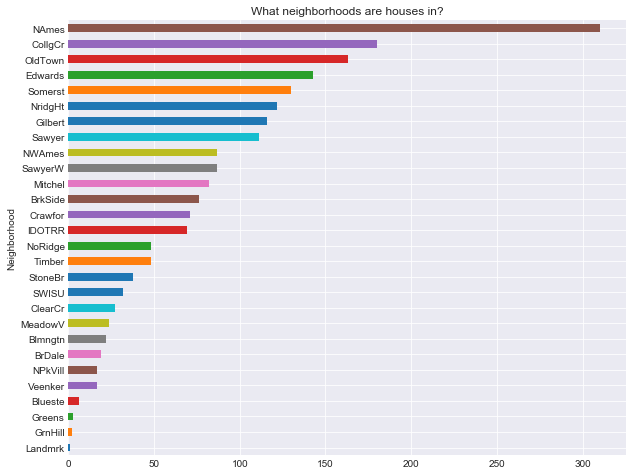

In [47]:
# Where are houses?
train.groupby('Neighborhood').Id.count().\
    sort_values().\
    plot(kind='barh', figsize=(10,8))
plt.title('What neighborhoods are houses in?')
plt.show()

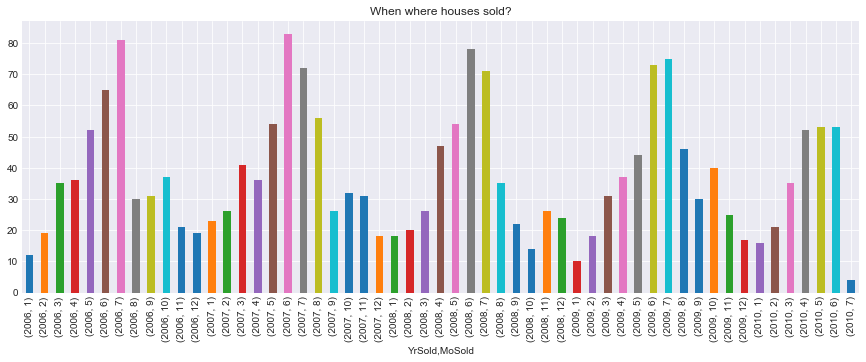

In [48]:
# When where houses sold?
train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(15,5))
plt.title('When where houses sold?')

plt.show()

The average house has 1,499 sq_ft of space, the median 1,444 sq ft
The biggest house has 5,642 sq_ft of space, the smallest 334 sq ft


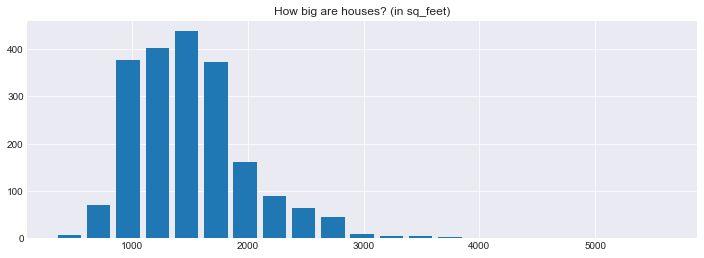

In [49]:
# How big are houses
print('The average house has {:,.0f} sq_ft of space, the median {:,.0f} sq ft'.format(
    train.GrLivArea.mean(), train.GrLivArea.median()))
print('The biggest house has {:,.0f} sq_ft of space, the smallest {:,.0f} sq ft'.format(
    train.GrLivArea.max(), train.GrLivArea.min()))
train.GrLivArea.hist(bins=21, rwidth=.8, figsize=(12,4))
plt.title('How big are houses? (in sq_feet)')
plt.show()

### How common factors are affecting the price of the houses ?


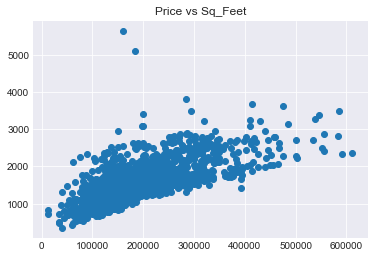

In [50]:
plt.scatter(train.SalePrice,train.GrLivArea)
plt.title("Price vs Sq_Feet");

###  plot above represnt relationship seem strong  between salePric and living area sq_ft 

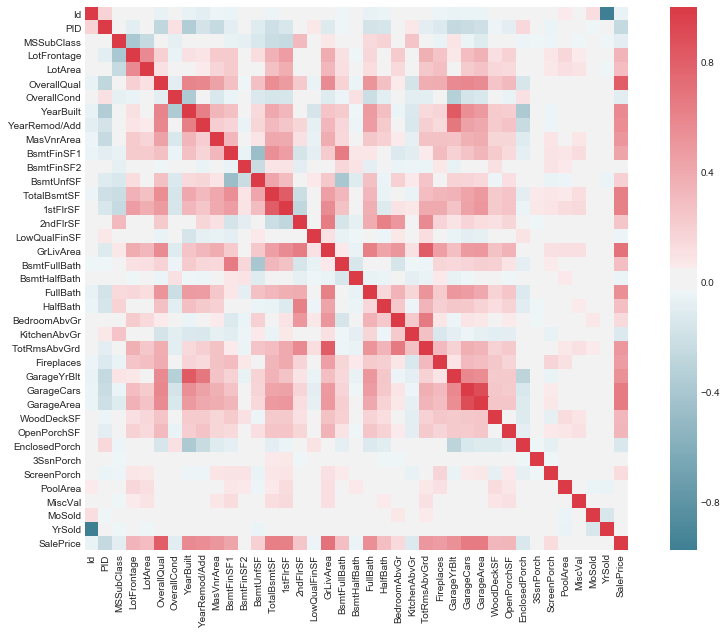

In [51]:
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 10));
corr = train.corr();
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

In [52]:
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  39
Number of Categorical features:  43


### Check datasets for missing values


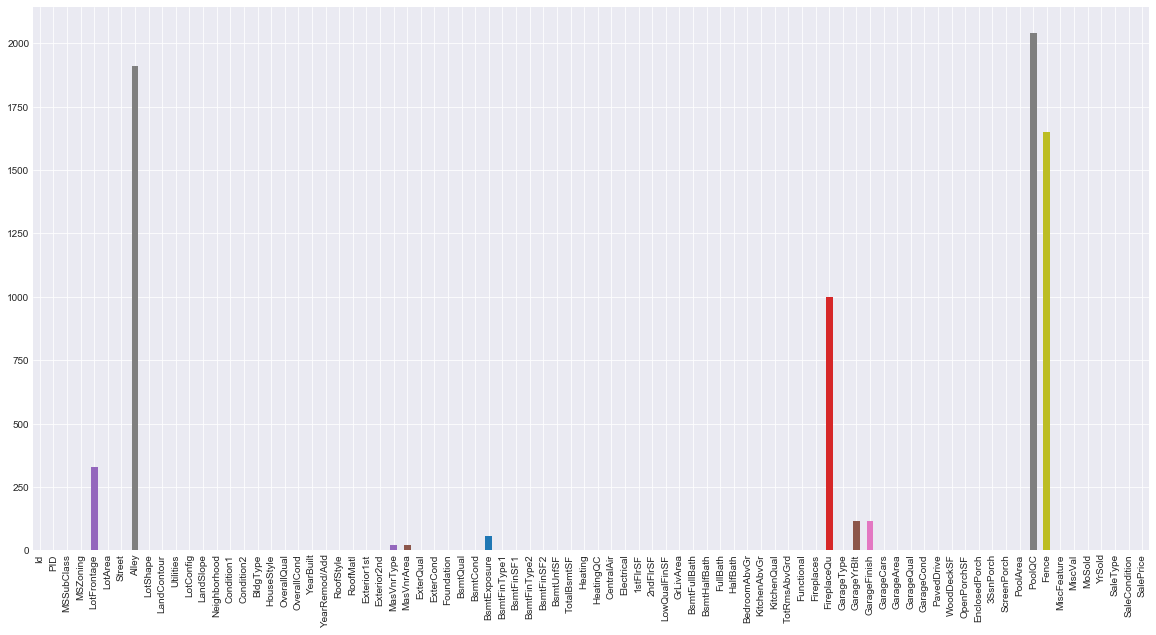

In [53]:
train.isnull().sum().plot(kind="bar",figsize=(20,10));

In [54]:
train.drop(['MSSubClass', 'MSZoning', ], axis=1, inplace=True)
train = train.dropna(subset=['BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtFullBath', 'GarageCars','BsmtFinType2', 'Electrical'])
train.isnull().sum()

Id                  0
PID                 0
LotFrontage       330
LotArea             0
Street              0
Alley            1908
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemod/Add       0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         22
MasVnrArea         22
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       998
GarageType          0
GarageYrBlt       113
GarageFinish      113
GarageCars          0
GarageArea          0
GarageQual          0
GarageCond          0
PavedDrive

### convert non numeric to 0,1 (dummeis)

In [55]:
def dummie_non_numeric(df):
    non_numeric_cols = list(set(df.columns)-set(df._get_numeric_data().sum().index))
    dummies = pd.get_dummies(df[non_numeric_cols])
    new = pd.concat([df, dummies], axis=1)
    return new

train = dummie_non_numeric(train)
test = dummie_non_numeric(test)

### represent the corrolation in each neighborhood with  SalePrice 

In [56]:
corr = train.corr()
sp_corr = corr['SalePrice'].sort_values(ascending=False)

neighborhood_index = []
fixed_neighborhood_index = []
for index in sp_corr.index:
    if index[:12] == 'Neighborhood':
        neighborhood_index.append(index)
        fixed_neighborhood_index.append(index[13:])
    
neighborhood_index

['Neighborhood_NridgHt',
 'Neighborhood_NoRidge',
 'Neighborhood_StoneBr',
 'Neighborhood_Somerst',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_ClearCr',
 'Neighborhood_GrnHill',
 'Neighborhood_NWAmes',
 'Neighborhood_Blmngtn',
 'Neighborhood_Gilbert',
 'Neighborhood_SawyerW',
 'Neighborhood_Greens',
 'Neighborhood_Landmrk',
 'Neighborhood_Blueste',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_SWISU',
 'Neighborhood_BrDale',
 'Neighborhood_MeadowV',
 'Neighborhood_BrkSide',
 'Neighborhood_Sawyer',
 'Neighborhood_Edwards',
 'Neighborhood_NAmes',
 'Neighborhood_IDOTRR',
 'Neighborhood_OldTown']

In [57]:
min_max_scaler = preprocessing.MinMaxScaler()
nc_scaled = min_max_scaler.fit_transform(pd.DataFrame(sp_corr[neighborhood_index]))
nc_normalized = pd.DataFrame(nc_scaled, index=sp_corr[neighborhood_index].index)
neighborhood_map = dict(zip(fixed_neighborhood_index, ((nc_normalized[0]+4.5)/5)**2))
neighborhood_map

{'NridgHt': 1.2100000000000002,
 'NoRidge': 1.0891268816837283,
 'StoneBr': 1.085054674809483,
 'Somerst': 1.0183136825762102,
 'Timber': 0.9977376717972585,
 'Veenker': 0.9776490789555076,
 'CollgCr': 0.9771003403519113,
 'Crawfor': 0.962767995783561,
 'ClearCr': 0.9592647804319795,
 'GrnHill': 0.9511494714851217,
 'NWAmes': 0.9488033683948136,
 'Blmngtn': 0.9428780536094,
 'Gilbert': 0.9423160648284659,
 'SawyerW': 0.9380307922993228,
 'Greens': 0.9302635448190983,
 'Landmrk': 0.9209696464036513,
 'Blueste': 0.9134852275948301,
 'Mitchel': 0.9074578113628265,
 'NPkVill': 0.9006853066324207,
 'SWISU': 0.8851965134438895,
 'BrDale': 0.8731602813393909,
 'MeadowV': 0.8639381167496206,
 'BrkSide': 0.8522353241072609,
 'Sawyer': 0.8514431744798219,
 'Edwards': 0.8260689996865802,
 'NAmes': 0.8204153895515262,
 'IDOTRR': 0.8203739532642687,
 'OldTown': 0.81}

In [58]:
train.replace({'Neighborhood':neighborhood_map},inplace=True)
test.replace({'Neighborhood':neighborhood_map},inplace=True)

In [59]:
# drop outliers from train data when house size > 4000sqft
train = train.drop(train.loc[train.GrLivArea > 4000].index)
train = train[np.abs(train.SalePrice-train.SalePrice.mean())<=(3*train.SalePrice.std())]

## feature engineering 

In [60]:
def feature_engineer(df):
    df['QualityAdjuster'] = (df['Neighborhood']+1)/2 * ((df['OverallQual']**2))

    df['AdjustedSize'] = \
        df['GrLivArea'] * df['QualityAdjuster']

    df['BathroomScore'] = \
        (df['FullBath']*2 + df['HalfBath']) * df['QualityAdjuster']

    df['GarageScore'] = \
        df['GarageCars'] * df['GarageArea'] 
    
    df['AdjGarageScore'] = \
        df['GarageScore'] * df['QualityAdjuster']
    
feature_engineer(train)
feature_engineer(test)

### represent the corrolation of our features with  SalePrice 

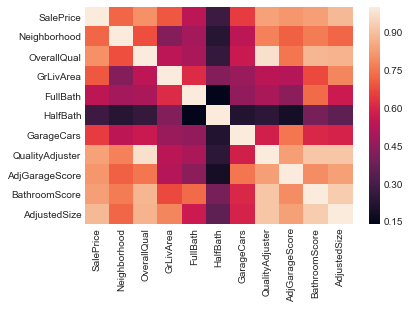

In [61]:
new_features = ['SalePrice','Neighborhood','OverallQual',
                'GrLivArea','FullBath','HalfBath',
                'GarageCars','QualityAdjuster', 'AdjGarageScore',
                'BathroomScore', 'AdjustedSize']

corr = train[new_features].corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Regression model

target and features selection 

In [62]:
features = ['QualityAdjuster', 'AdjustedSize', 'BathroomScore',
            'AdjGarageScore', 'GrLivArea','GarageType_Detchd',
            'MasVnrType_None', 'GarageFinish_Unf', 'BsmtQual_TA',
            'KitchenQual_TA', 'ExterQual_TA']

X = train[features]
y = train['SalePrice']

In [68]:

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# fit model
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

#fitting lasso Regression 
lasso = Lasso()
cross_val_score(lasso, X_train_scaled, y_train).mean()


params = {
    'alpha': np.arange(.001, .15, .0025)
}
gs = GridSearchCV(lasso, params)
gs.fit(X_train_scaled, y_train)
print(gs.best_params_)
print(gs.score(X_validate_scaled, y_test))

X_test = test[features]
X_test_scaled = ss.transform(X_test)

predictions = gs.predict(X_test_scaled)

test['SalePrice'] = predictions

test[['Id', 'SalePrice']].to_csv('reg_submission.csv', index=False)

{'alpha': 0.006}
-0.01164716940587307


## classification

In [65]:
encoded_sale = {
    'Abnorml': 1,
    'Normal': 0,
    'Partial': 0,
    'Family':0,
    'Alloca':0,
    'AdjLand':0
}

train['SaleConditionEncoded'] = train['SaleCondition'].map(encoded_sale)

features = ['QualityAdjuster', 'AdjustedSize',
            'BathroomScore', 'AdjGarageScore',
            'GrLivArea','GarageType_Detchd', 
            'MasVnrType_None','GarageFinish_Unf',
            'BsmtQual_TA', 'KitchenQual_TA', 'ExterQual_TA']

X = train[features]
y = train['SaleConditionEncoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_validate_scaled = ss.transform(X_test)

## Fitting the Default KNN

knn = KNeighborsClassifier()
cross_val_score(knn, X_train_scaled, y_train).mean()

params = {
    'n_neighbors': range(5,30),
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}
gs = GridSearchCV(knn, params)
gs.fit(X_train_scaled, y_train)
print(gs.best_params_)
print(gs.score(X_validate_scaled, y_validate))

X_test = test[features]
X_test_scaled = ss.transform(X_test)

predictions = gs.predict(X_test_scaled)

test['Sale Condition'] = predictions

test[['Id', 'Sale Condition']].to_csv('classification_submission.csv', index=False)

df = pd.read_csv('classification_submission.csv')
df.head()

{'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
0.9365079365079365


,Id,Sale Condition
0,2658,0
1,2718,0
2,2414,0
3,1989,0
4,625,0
